In [3]:
import pandas as pd
from numpy.random import normal

### Probababity Density Function

In [4]:
import random

In [3]:
L=[]
for i in range(10000):
    L.append(random.randint(1,6))

In [4]:
len(L)

10000

In [5]:
L[:10]

[2, 4, 1, 1, 1, 6, 6, 3, 4, 3]

In [12]:
s =(pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [13]:
s

1    0.1700
2    0.1659
3    0.1618
4    0.1625
5    0.1728
6    0.1670
Name: count, dtype: float64

<Axes: >

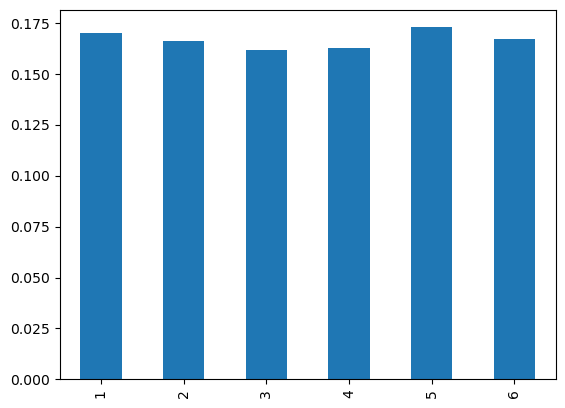

In [14]:
s.plot(kind='bar')

In [5]:
import numpy as np

In [16]:
np.cumsum(s)

1    0.1700
2    0.3359
3    0.4977
4    0.6602
5    0.8330
6    1.0000
Name: count, dtype: float64

<Axes: >

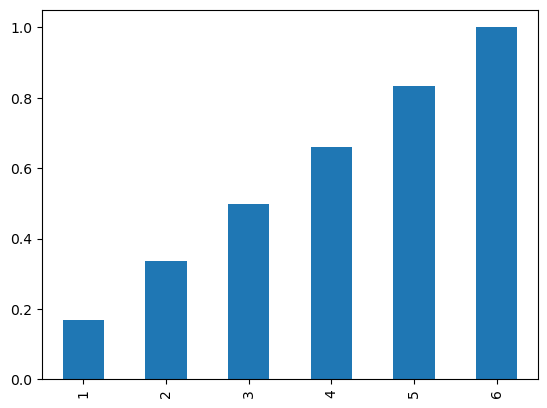

In [17]:
np.cumsum(s).plot(kind='bar')

### Parametric Density Estimation

In [20]:
sample = normal(loc=50, scale=5,size=1000)

In [21]:
sample.mean()

50.1554097392924

(array([  1.,   4.,  31., 155., 275., 296., 176.,  53.,   6.,   3.]),
 array([28.68218211, 32.88305286, 37.08392362, 41.28479438, 45.48566514,
        49.68653589, 53.88740665, 58.08827741, 62.28914817, 66.49001892,
        70.69088968]),
 <BarContainer object of 10 artists>)

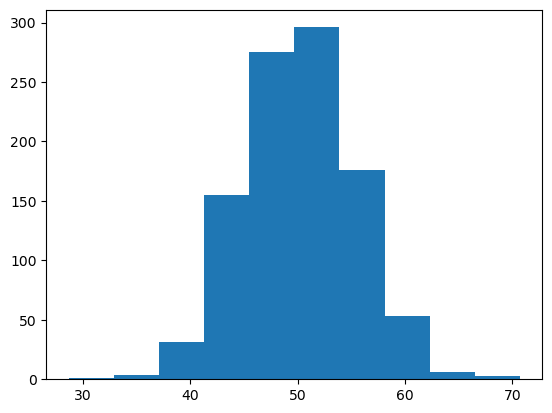

In [23]:
#plot the histogram
import matplotlib.pyplot as plt
plt.hist(sample,bins=10)

In [24]:
sample_mean= sample.mean()
sample_std =sample.std()

In [25]:
#fitting the distribution with above parameter
from scipy.stats import norm
dist =norm(sample_mean,sample_std)

In [30]:
sample.min(), sample.max()

(28.682182106596493, 70.69088968068036)

In [31]:
values = np.linspace(28.6,70.79,num =100)

In [32]:
dist

In [33]:
probablities = [dist.pdf(value) for value in values]

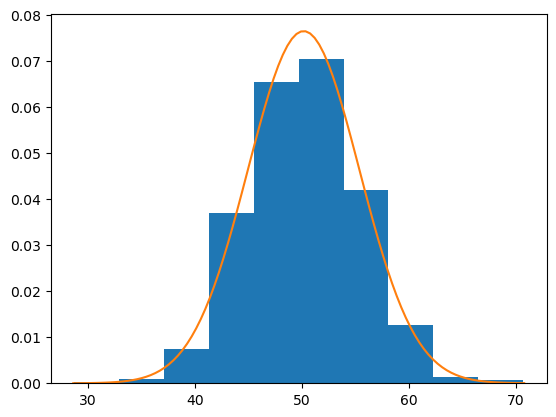

In [37]:
plt.hist(sample,bins=10,density=True)
plt.plot(values,probablities)

In [38]:
import seaborn as sns

c:\Users\Dell\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


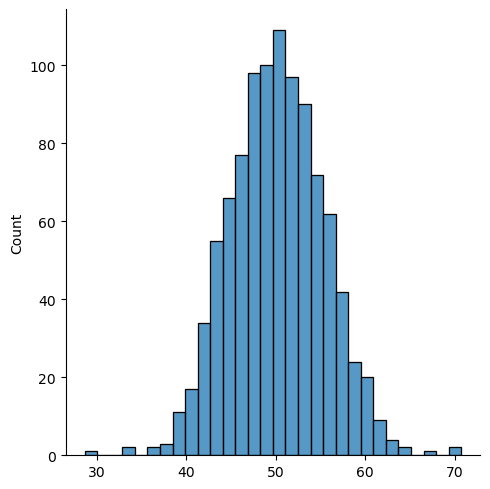

In [39]:
sns.displot(sample)

In [1]:
### KDE

### KDE

In [6]:
sample1 = normal(loc=20,scale=5,size=300)
sample2 = normal(loc=10,scale=5, size=700)

sample=np.hstack((sample1,sample2))

In [7]:
sample

array([18.89617612, 22.34248265, 19.55324662, 23.31031344, 17.21449298,
       22.6883769 , 18.34911505, 21.15116487, 28.06313834, 20.93172807,
       15.4439236 , 12.39572517, 14.9630204 , 21.35493643, 17.50631266,
       24.28862279, 15.82852197, 24.94674955, 28.64558287, 26.50861711,
       13.43843754, 16.2948968 , 19.55923709, 18.58886327, 20.42513035,
       27.61545765, 28.53984669, 21.12629994, 22.19479793, 15.02840844,
       13.48450186, 14.98151673, 18.84344314, 22.86422794, 18.0513011 ,
       13.81504958, 12.8724785 , 19.17052011, 13.587734  , 27.46401219,
       18.12421603, 20.31104468, 16.17214983, 30.31594587, 23.02975505,
       17.05518945, 29.28859918, 18.05428647, 18.86164228, 28.64106404,
       20.28285953, 18.99586705, 18.52792165, 19.78043918, 14.17383783,
       24.50193394, 21.23865795, 17.50815335, 27.72564695, 21.27288566,
       21.54713997, 20.61997599, 14.60834389, 28.40483172, 19.06696582,
       15.69780581, 24.154166  , 20.5837508 , 19.7292597 , 27.07

(array([ 1.,  1.,  0.,  1.,  5.,  1.,  1.,  4.,  3.,  3., 11.,  8., 12.,
        14., 17., 19., 26., 20., 23., 36., 42., 37., 50., 35., 38., 38.,
        33., 34., 35., 40., 29., 29., 31., 27., 25., 30., 34., 35., 20.,
        15., 26., 16., 11., 13.,  9., 11.,  9.,  6., 11.,  7.,  4.,  7.,
         1.,  1.,  3.,  1.,  0.,  0.,  0.,  1.]),
 array([-5.7105041 , -5.0442468 , -4.3779895 , -3.7117322 , -3.04547491,
        -2.37921761, -1.71296031, -1.04670301, -0.38044572,  0.28581158,
         0.95206888,  1.61832617,  2.28458347,  2.95084077,  3.61709807,
         4.28335536,  4.94961266,  5.61586996,  6.28212726,  6.94838455,
         7.61464185,  8.28089915,  8.94715644,  9.61341374, 10.27967104,
        10.94592834, 11.61218563, 12.27844293, 12.94470023, 13.61095753,
        14.27721482, 14.94347212, 15.60972942, 16.27598671, 16.94224401,
        17.60850131, 18.27475861, 18.9410159 , 19.6072732 , 20.2735305 ,
        20.9397878 , 21.60604509, 22.27230239, 22.93855969, 23.60481698,
 

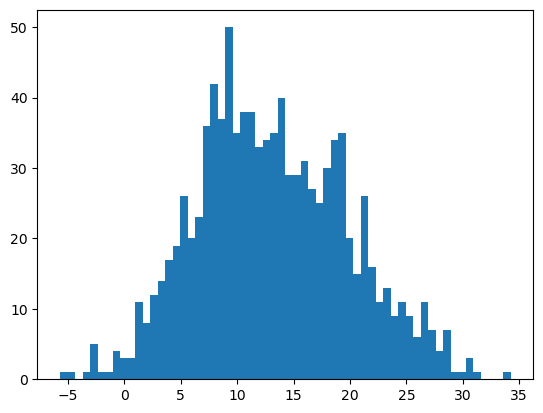

In [10]:
import matplotlib.pyplot as plt
plt.hist(sample,bins=60)

In [11]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth=3,kernel="gaussian")

In [12]:
sample =sample.reshape((len(sample),1))

In [13]:
model.fit(sample)

KernelDensity(bandwidth=3)

In [14]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values),1))

In [15]:
prob = model.score_samples(values)

In [16]:
prob =np.exp(prob)

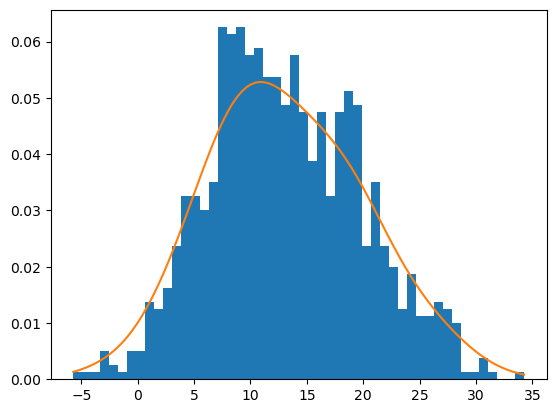

In [17]:
plt.hist(sample,bins=50,density=True)
plt.plot(values[:],prob)
plt.show()